# Computational Social Science Project #2 

**Enter your Name:** Jacqueline Brown

*Semester:* Fall 2023


Below we fill in some of the code you might use to answer some of the questions. Here are some additional resources for when you get stuck:
* Code and documentation provided in the course notebooks  
* [Markdown cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) to help with formatting the Jupyter notebook
* Try Googling any errors you get and consult Stack Overflow, etc. Someone has probably had your question before!
* Send me a pull request on GitHub flagging the syntax that's tripping you up 

**INSTRUCTIONS:** For this project, copy all of the files in the Project 2 folder in the course repo into a "Project 2" subfolder within the "Computational Social Science Projects" directory that you created for the first project. You will work on the project locally, push your project to GitHub, and submit a link to the GitHub repo on bCourses by the project deadline. Be sure the final submission is in the main branch, which is what I'll pull down and re-run to grade. 

## 1. Introduction/Setup

#### a) Import relevant libraries
Here are some libraries you will need to get started. Along the way you may need to add more. Best practice is to add them here at the top of the script.

In [130]:
#
# import libraries you might need here 
#-----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# use random seed for consistent results 
np.random.seed(273)

#### b) Read in and inspect data frame 
Read in the data frame and look at some of its attributes. Read in the data contained in the projoect folder: "Diabetes with Population Info by County 2017.csv".

In [131]:
#
# read in and inspect data frame
#-----------
# Note that "CountyFips" needs to be a string so the leading 0 isn't dropped (only if you want to make choropleth map) 
diabetes = pd.read_csv('Diabetes with Population Info by County 2017 copy.csv', 
                       dtype={"CountyFIPS": str}) 

In [132]:
#
# look at shape
#-----------
# look at the dimensions of the diabetes data frame
print('shape: ', diabetes.shape) 

shape:  (3220, 95)


In [133]:
#
# set pandas parameters
#-----------
# tells pandas how many rows to display when printing so results don't get truncated
pd.set_option('display.max_rows', 100)

# look at the data types for each column in diabetes df (likely be located under each row bc column names are long)
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                          object
Obesity_Number                                                                                                                                           object
Physical_Inactivity_Number                                                                                                                               object
sex and age_total population

In [197]:
diabetes.describe()

,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race - and three 

Immediately, we see that some of the features that should be numeric (e.g., Diabetes_Number, Obesity_Number,  and Physical_Inactivity_Number) are not. We can check to see what the non-numeric values are in a column where we are expecting numeric information with a combination of `str.isnumeric()` and `unique()`.

In [135]:
#
# identify non-numeric features
#-----------
# Return rows where the column "Diabetes_Number" is non-numeric and get the unique values of these rows
# the "~" below in front of diabetes negates the str.isnumeric() so it only takes non-numeric values
print(diabetes[~diabetes["Diabetes_Number"].str.isnumeric()]["Diabetes_Number"].unique())

['Suppressed']


In [136]:
#
# Now do the same as above, but for "Obesity_Number"
#-----------
print(diabetes[~diabetes["Obesity_Number"].str.isnumeric()]["Obesity_Number"].unique()) 


['No Data']


In [137]:
#
# Now do the same as above, but for "Physical_Inactivity_Number" 
#-----------

print(diabetes[~diabetes["Physical_Inactivity_Number"].str.isnumeric()]["Physical_Inactivity_Number"].unique()) 


['No Data']


These values ("Suppresssed" and "No Data") contained in the two respective columns are coercing these features to objects instead of them being  integers. Let's drop those rows in the next section, and also recode "Physical_Inactivity_Number" feature to be an integer.

#### c. Recode variables

Convert 'Diabetes_Number', 'Obesity_Number', and 'Physical_Inactivity_Number' to integers below so we can use them in our analysis. Also fill in the object type we want to recode 'sex and age_total population_65 years and over_sex ratio (males per 100 females)' too (you'll have to scroll all the way over to the right).

In [138]:
#
# Recode variables
#-----------

# Diabetes
# ----------
# keep only useful info about our target feature, i.e., where diabetes_number not = 'Suppressed'
# note that the inside reference to the diabetes df identifies the column, and the outer calls specific rows according to a condition 
diabetes = diabetes[diabetes['Diabetes_Number']!="Suppressed"] 

# use the astype method on Diabetes_Number to convert it to an integer...if you are not sure, what does the astype() documentation tell you are possible arguments? 
diabetes['Diabetes_Number'] = diabetes['Diabetes_Number'].astype('int64', copy = None, errors = 'raise') 

# Obesity
diabetes = diabetes[diabetes['Obesity_Number']!="No Data"] 
diabetes['Obesity_Number'] = diabetes['Obesity_Number'].astype('int64', copy = None, errors = 'raise') 


# Physical Inactivity
diabetes = diabetes[diabetes['Physical_Inactivity_Number']!="No Data"] 
diabetes['Physical_Inactivity_Number'] = diabetes['Physical_Inactivity_Number'].astype('int64', copy = None, errors = 'raise') 

# Some final changes 
# ----------
# 65+ sex ratio had one "-" in it so let's drop that row first
diabetes = diabetes[diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)']!= "-"]

# change to numeric from string, since it originally included the "-", which made it a string
# you'll have to decide whether to make it integer or float 
diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'] = diabetes['sex and age_total population_65 years and over_sex ratio (males per 100 females)'].astype('float', copy = None, errors = 'raise')

In [139]:
print('data types:', diabetes.dtypes)

data types: County                                                                                                                                                   object
State                                                                                                                                                    object
CountyFIPS                                                                                                                                               object
Diabetes_Number                                                                                                                                           int64
Obesity_Number                                                                                                                                            int64
Physical_Inactivity_Number                                                                                                                                int64
sex and age_total population

We should probably scale our count variables to be proportional to county population. We create the list 'rc_cols' to select all the features we want to rescale, and then use the `.div()` method to avoid typing out every single column we want to recode. 

In [140]:
#
# Scale to county populations
#-----------

# select count variables to recode to percentages; make sure we leave out ratios and our population variable 
# because these don't make sense to scale by population
rc_cols = [col for col in diabetes.columns if col not in ['County', 'State', 'CountyFIPS', 
                                                        'sex and age_total population_65 years and over_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_sex ratio (males per 100 females)', 
                                                        'sex and age_total population_18 years and over_sex ratio (males per 100 females)',  
                                                        'race_total population']]
           
# recode all selected columns to numeric
diabetes[rc_cols] = diabetes[rc_cols].apply(pd.to_numeric, errors='coerce') 

# divide all columns but those listed above by total population to calculate rates
diabetes[rc_cols] = diabetes[rc_cols].div(diabetes['race_total population'], axis=0)

Let's check our work. Are all rates bounded by 0 and 1 as expected? 

In [141]:
#
# check
#-----------
# set pandas options
pd.set_option('display.max_columns', None)

# inspect recoded values
diabetes_summary = diabetes.describe().transpose() # note we use the transpose method rather than .T because this object is not a numpy array
  
# check recoding 
with pd.option_context('display.max_rows', 100, 'display.max_columns', None): 
    display(diabetes_summary.iloc[ : ,[0,1,3,7]]) # select which columns in the summary table we want to present

,count,mean,min,max
Diabetes_Number,3112.0,0.092857,0.019038,2.242079e-01
Obesity_Number,3112.0,0.251666,0.088946,4.767883e-01
Physical_Inactivity_Number,3112.0,0.200861,0.064949,3.922853e-01
sex and age_total population_65 years and over_sex ratio (males per 100 females),3112.0,84.275643,34.700000,2.200000e+02
race_total population,3112.0,103682.624036,228.000000,1.009805e+07
race_total population_one race,3112.0,0.976059,0.713126,1.000000e+00
race_total population_two or more races,3112.0,0.023941,0.000000,2.868743e-01
race_total population_one race_1,3112.0,0.976059,0.713126,1.000000e+00
race_total population_one race_white,3112.0,0.831107,0.038912,1.000000e+00
race_total population_one race_black or african american,3112.0,0.090215,0.000000,8.741228e-01


#### d. Check for duplicate columns

There are a lot of columns in this data frame. Let's see if there are any are duplicates. Note that Pandas will not allow them to have the same exact column name, so they will likely be distinct on column name but will be copies otherwise.

In [142]:
#
# Check for duplicate columns
#-----------
# I used Google to figure this out, and adapted this example for our purposes:  
# source: https://thispointer.com/how-to-find-drop-duplicate-columns-in-a-dataframe-python-pandas/ 
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

duplicateColumnNames = list(getDuplicateColumns(diabetes))
print('Duplicate Columns are as follows: ')
duplicateColumnNames

Duplicate Columns are as follows: 


['sex and age_total population',
 'race_total population_one race_1',
 'race_total population_two or more races_1',
 'sex and age_total population_18 years and over_1',
 'hispanic or latino and race_total population',
 'sex and age_total population_65 years and over_1']

In [143]:
#
# drop columns from duplicates list
#-----------
# now drop list of duplicate features from our df using the .drop() method
diabetes = diabetes.drop(columns = ['sex and age_total population_65 years and over_1',
 'race_total population_two or more races_1',
 'sex and age_total population_18 years and over_1',
 'hispanic or latino and race_total population',
 'race_total population_one race_1',
 'sex and age_total population'], axis = 1) 

Finally, there are many states accounted for the in dataset. If we convert this column to a categorical variable, and create dummies, it will create a rather sparse matrix (many 0s in our dataset) becuase there will be 49 dummy variables. One alternative is to classify each state to a larger US region and use that variable instead of state. The following code will do that.

In [144]:
# Define a dictionary mapping states to regions
state_to_region = {
    'Alabama': 'Southeast',
    'Alaska': 'West',
    'Arizona': 'West',
    'Arkansas': 'South',
    'California': 'West',
    'Colorado': 'West',
    'Connecticut': 'Northeast',
    'Delaware': 'Northeast',
    'District of Columbia': 'Southeast',
    'Florida': 'Southeast',
    'Georgia': 'Southeast',
    'Hawaii': 'West',
    'Idaho': 'West',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Iowa': 'Midwest',
    'Kansas': 'Midwest',
    'Kentucky': 'South',
    'Louisiana': 'South',
    'Maine': 'Northeast',
    'Maryland': 'Northeast',
    'Massachusetts': 'Northeast',
    'Michigan': 'Midwest',
    'Minnesota': 'Midwest',
    'Mississippi': 'South',
    'Missouri': 'Midwest',
    'Montana': 'West',
    'Nebraska': 'Midwest',
    'Nevada': 'West',
    'New Hampshire': 'Northeast',
    'New Jersey': 'Northeast',
    'New Mexico': 'West',
    'New York': 'Northeast',
    'North Carolina': 'Southeast',
    'North Dakota': 'Midwest',
    'Ohio': 'Midwest',
    'Oklahoma': 'South',
    'Oregon': 'West',
    'Pennsylvania': 'Northeast',
    'Rhode Island': 'Northeast',
    'South Carolina': 'Southeast',
    'South Dakota': 'Midwest',
    'Tennessee': 'South',
    'Texas': 'South',
    'Utah': 'West',
    'Vermont': 'Northeast',
    'Virginia': 'Southeast',
    'Washington': 'West',
    'West Virginia': 'South',
    'Wisconsin': 'Midwest',
    'Wyoming': 'West'
}

# Add a new 'Region' column based on the mapping
diabetes['Region'] = diabetes['State'].map(state_to_region)

# Print to verify'Region' column has been added
diabetes


,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some

## 2. Exploratory Data Analysis

Make at least two figures (feel free to make more) and explain their relevance to the scientific problem. The goal here is to uncover interesting patterns in the data, learn more about the scope of the problem, and communicate these findings to your audience in clear ways.

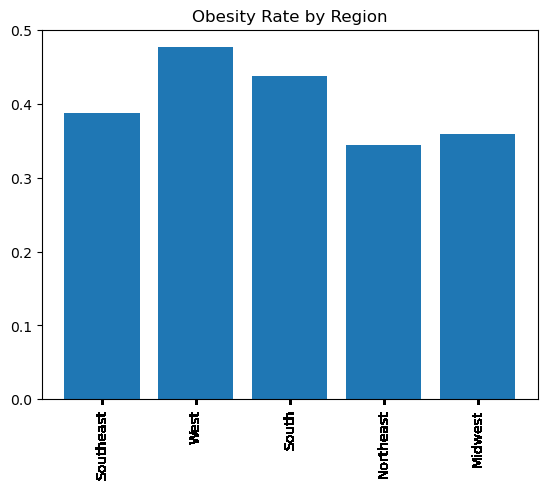

In [145]:
# clear figure
plt.clf()

# subset each column of the dataframe for plotting
x = diabetes["Region"]
y = diabetes["Obesity_Number"]

# plot x and y
plt.bar(x, y)

# add title
plt.title('Obesity Rate by Region')

# add ticks on x axis and rotate 90 degrees
plt.xticks(x, x, rotation = 90)

# plot
plt.show()



The above figure shows the obesity rate by region. Given that being overweight increases one's risk of obesity, the obesity rate of the region/county would likely be a major factor in the model. I would hypothesize that diabetes rates in Western and Southern counties are higher than in other counties. 

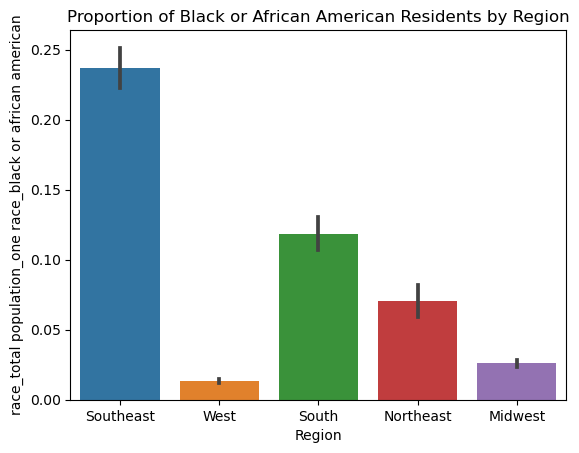

In [146]:
# clear figure
plt.clf()

# plot
sns.barplot(x="Region",
            y="race_total population_one race_black or african american",
            data=diabetes)

# add title
plt.title('Proportion of Black or African American Residents by Region')

#show plot
plt.show()

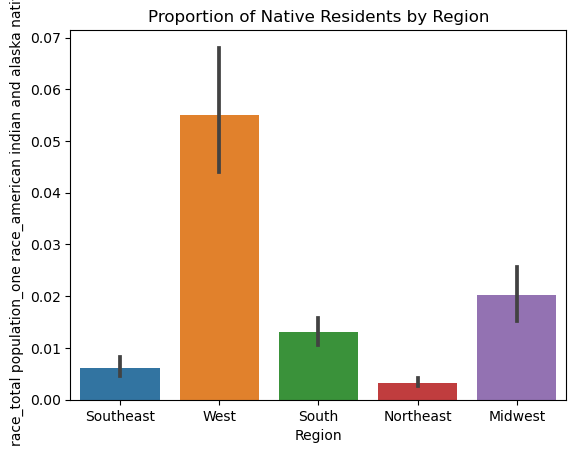

In [147]:
# clear figure
plt.clf()

# plot
sns.barplot(x="Region",
            y="race_total population_one race_american indian and alaska native",
            data=diabetes)

# add title
plt.title('Proportion of Native Residents by Region')

#show plot
plt.show()

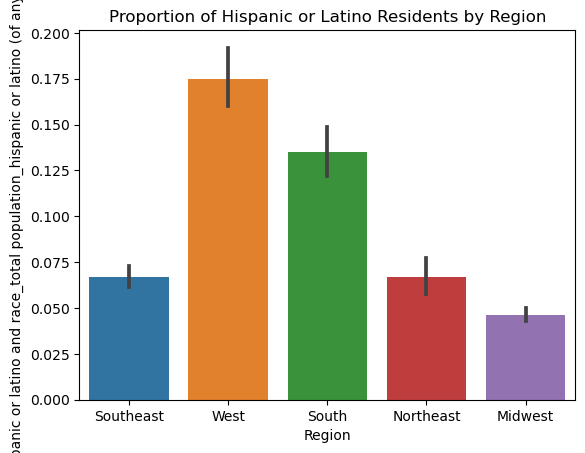

In [148]:
# clear figure
plt.clf()

# plot
sns.barplot(x="Region",
            y="hispanic or latino and race_total population_hispanic or latino (of any race)",
            data=diabetes)

# add title
plt.title('Proportion of Hispanic or Latino Residents by Region')

#show plot
plt.show()

The above graphs shows the proportion of Black or African American, Native American, and Hispanic/Latinx residents by region. We see that the South and Southeast have the highest proportion of Black residents, while the West has the highest proportion of Native residents. Hispanic residents are the most balanced across region, but are more densely populated in the West and the South regions. Given that these groups are more disposed to type 2 diabetes (according to the CDC), it's likely that regions with a higher concentration of these groups could be associated with an increased rate of diabetes. 

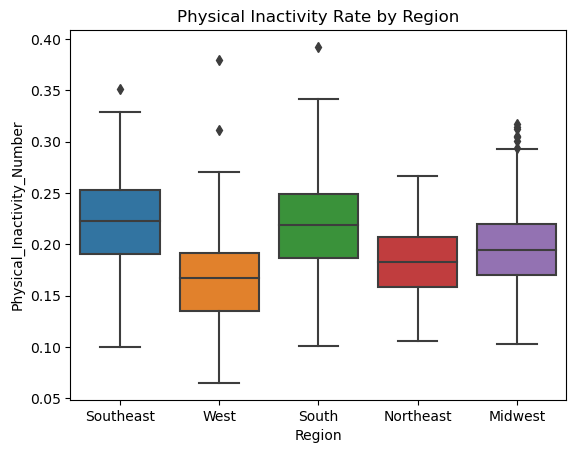

In [202]:
# clear figure
plt.clf()

# Physical Inactivity Plot
sns.boxplot(x = "Region", 
            y = "Physical_Inactivity_Number",
           data = diabetes)
# add title
plt.title('Physical Inactivity Rate by Region')

# plot
plt.show()

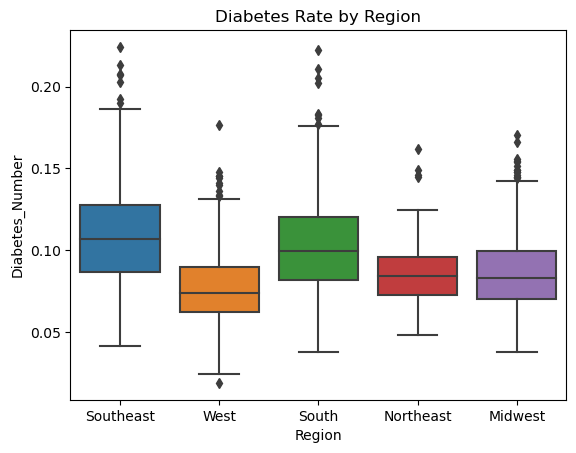

In [203]:
# clear figure
plt.clf()

# Diabetes Plot
sns.boxplot(x = "Region", 
            y = "Diabetes_Number",
           data = diabetes)
# add title
plt.title('Diabetes Rate by Region')

# plot
plt.show()

I was just curious about the diabetes rate by region. I mention this in my analysis, but it's interesting that there isn't significant variation between the regions - and that it follows the same trend as the physical inactivity variable. 

## 3. Prepare to Fit Models

### 3.1 Finalize Data Set

We've already cleaned up the data, but we can make a few more adjustments before partitioning the data and training models. Let's recode 'Region' to be a categorical variable using `pd.get_dummies` and drop 'State'. Also, we'll drop 'County' because 'CountyFIPS' is already a unique identifier for the county. 

In [150]:
diabetes_clean = diabetes
diabetes_clean.head()

,County,State,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some

In [151]:
# Drop and get dummies
#-----------

# create dummy features out of 'Region', which might be related to diabetes rates 
diabetes_clean = pd.get_dummies(diabetes_clean, 
                               columns = ['Region'],  
                               drop_first = True) # drop the first as a reference 

In [152]:
# drop 'County' and 'State' variables
diabetes_clean = diabetes_clean.drop(labels = ['State', 'County'],
                               axis = 1) # which axis tells python we want to drop columns rather than index rows?

# look at first 10 rows of new data frame 
diabetes_clean.head(10)

,CountyFIPS,Diabetes_Number,Obesity_Number,Physical_Inactivity_Number,sex and age_total population_65 years and over_sex ratio (males per 100 females),race_total population,race_total population_one race,race_total population_two or more races,race_total population_one race_white,race_total population_one race_black or african american,race_total population_one race_american indian and alaska native,race_total population_one race_american indian and alaska native_cherokee tribal grouping,race_total population_one race_american indian and alaska native_chippewa tribal grouping,race_total population_one race_american indian and alaska native_navajo tribal grouping,race_total population_one race_american indian and alaska native_sioux tribal grouping,race_total population_one race_asian,race_total population_one race_asian_asian indian,race_total population_one race_asian_chinese,race_total population_one race_asian_filipino,race_total population_one race_asian_japanese,race_total population_one race_asian_korean,race_total population_one race_asian_vietnamese,race_total population_one race_asian_other asian,race_total population_one race_native hawaiian and other pacific islander,race_total population_one race_native hawaiian and other pacific islander_native hawaiian,race_total population_one race_native hawaiian and other pacific islander_guamanian or chamorro,race_total population_one race_native hawaiian and other pacific islander_samoan,race_total population_one race_native hawaiian and other pacific islander_other pacific islander,race_total population_one race_some other race,race_total population_two or more races_white and black or african american,race_total population_two or more races_white and american indian and alaska native,race_total population_two or more races_white and asian,race_total population_two or more races_black or african american and american indian and alaska native,race alone or in combination with one or more other races_total population,race alone or in combination with one or more other races_total population_white,race alone or in combination with one or more other races_total population_black or african american,race alone or in combination with one or more other races_total population_american indian and alaska native,race alone or in combination with one or more other races_total population_asian,race alone or in combination with one or more other races_total population_native hawaiian and other pacific islander,race alone or in combination with one or more other races_total population_some other race,hispanic or latino and race_total population_hispanic or latino (of any race),hispanic or latino and race_total population_hispanic or latino (of any race)_mexican,hispanic or latino and race_total population_hispanic or latino (of any race)_puerto rican,hispanic or latino and race_total population_hispanic or latino (of any race)_cuban,hispanic or latino and race_total population_hispanic or latino (of any race)_other hispanic or latino,hispanic or latino and race_total population_not hispanic or latino,hispanic or latino and race_total population_not hispanic or latino_white alone,hispanic or latino and race_total population_not hispanic or latino_black or african american alone,hispanic or latino and race_total population_not hispanic or latino_american indian and alaska native alone,hispanic or latino and race_total population_not hispanic or latino_asian alone,hispanic or latino and race_total population_not hispanic or latino_native hawaiian and other pacific islander alone,hispanic or latino and race_total population_not hispanic or latino_some other race alone,hispanic or latino and race_total population_not hispanic or latino_two or more races,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races including some other race,hispanic or latino and race_total population_not hispanic or latino_two or more races_two races excluding some other race -

### 3.2 Partition Data, Feature Selection, and Standardization

Now, we will partition our data to prepare it for the training process. Ultimately we want to use a 60% train—20% validation—20% test in this case. More data in the training set lowers bias, but then increases variance in the validation/test sets. Balancing between bias and variance with choice of these set sizes is important as we want to ensure that there is enough data to train on to get good predictions, but also want to make sure our hold-out sets are representative enough.

Work through partitioning the data into the test/train/validation sets in the chunks below. Be sure to that if you are using Ridge or LASSO, you Standardize the data. Where you do this in the workflow matters so be clear about where you are doing this and why. 

In [153]:
#
# Partition data
#-----------

# import library
from sklearn.model_selection import train_test_split

# create y dataframe 
y = diabetes_clean['Diabetes_Number']

# create X dataframe (include everything except "Diabetes_Number", our target, 
# and "race alone or in combination with one or more other races_total population")
X = diabetes_clean.drop(['Diabetes_Number', 'race alone or in combination with one or more other races_total population'],
                       axis = 1)

Investigate whether there are any features that you should remove prior to spliting and model fitting. You may also consider using plots and relationships you found in the EDA stage for this question. Be sure to justify your logic. 

In [154]:
#
# Feature selection
#-----------



In [155]:
#
# Training/test split
#-----------

# set the random seed
np.random.seed(10)


# split the data so that it returns 4 values: X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X,                 # specify training dataset
                                                    y,                 # specify test dataset
                                                    train_size=.8,      # specify proportional split for training
                                                    test_size=.2)       # specify proportional split for test

In [156]:
#
# Validation split
#-----------

# train_test_split returns 4 values: X_train, X_test, y_train, y_test, so how do we create a 60-20-20 train-validate-test split? 
X_train, X_validate, y_train, y_validate = train_test_split(X_train,
                                                           y_train,
                                                           train_size = .75,
                                                           test_size = .25)

QUESTION: Explain your choice of how much data to include in each set, and the tradeoffs involved with differing sizes in each set. Also, describe the purpose of each set.

Per the assignment, I used a 60% train, 20% validate, 20% test split. This is the standard choice to minimize the bias /variance tradeoff in the model. More training data decreases the bias but can lead to higher variance through overfitting. However, with too little training data, predictions will not be accurate. The training set allows the model to identify which features have the largest effect on the outcome variable. The validation set is used to test different models to see which don't generalize as well. The test set is used to try the model with the best fit to calculate predictions on the outcome variable based on the features. 

In [157]:
#
# Standardization
#-----------
# Given that we want to only standardize non-dichotomous variables, we need to find a 
# solution that will loop over only the columns we want to standardize. The code below
# identifies all non-dichotomous variables in our dataset and only standardizes those.

# load library and create instance of Standard Scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


# identify non-dichotomous columns we want to transform
columns = list(X_test.select_dtypes(include=['number']).loc[:, X_test.nunique() > 2])

# use loop to transform training data for only columns we want to transform
for column in columns:
    X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1)).flatten()

# use loop to transform validation data for only columns we want to transform
for column in columns:
    X_validate[column] = scaler.fit_transform(X_validate[column].values.reshape(-1, 1)).flatten()

# use loop to transform test data for only columns we want to transform
for column in columns:
    X_test[column] = scaler.fit_transform(X_test[column].values.reshape(-1, 1)).flatten()

## 4. Train Models

In this section, train your models. 

**Note that if you use Lasso, you will likely need to specify a very high penalty (very low, like alpha of 0.001) because of convergence problems.**

### 4.1 Describe models

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem.

**MODEL DESCRIPTION(S):** ...

### 4.2 Train models

Train each model in the training set, and be sure to tune hyperparameters if appropriate. Report any relevant summary statistics from the training set, including how well each model fits the training data.

#### Model 1:  OLS

In [158]:
#Import libraries
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [159]:
# Model 1 training: OLS

# create a model
lin_reg = LinearRegression()

# fit the model
lin_model = lin_reg.fit(X_train, y_train)

# model output
print(lin_model.coef_)
print(lin_model.intercept_)


[-5.13926868e-08  8.07992837e-03  7.19874363e-03  3.24667026e-03
  3.32980329e-04 -4.91419639e-03  4.91419639e-03 -4.85856124e-02
  4.39378485e-02  1.61475798e-02  1.14905611e-03 -7.67725761e-05
  6.67962693e-04  1.32519638e-03  1.19733752e-02  8.04202210e-03
  1.08784891e-02  1.01147925e-02  6.45367112e-03  3.50742549e-03
  3.82300323e-03  7.97702603e-03 -9.30162972e-04 -1.02499904e-03
  1.55753831e-04 -7.16419392e-04 -4.57367214e-04  1.89424630e-03
 -2.97369383e-03 -8.56009240e-03 -2.31577153e-03 -5.65191275e-04
  3.68670424e-03 -4.25769106e-02 -3.33785286e-02 -3.09322363e-02
 -3.97986118e-03 -1.31932349e-02  4.17504512e-03  4.76537026e-03
 -6.80282781e-04 -5.77817047e-05 -2.27691111e-04 -4.17504512e-03
  1.63245777e-02 -2.32271346e-02  3.03875593e-03 -2.58063651e-02
  4.70525410e-03  1.86392418e-04  2.81127133e-03  2.12440526e-05
  2.82743061e-03 -3.16861978e-04  1.43490967e-03  2.38769604e-03
 -3.87911420e-04  2.47614669e-03 -2.47614669e-03 -5.20741688e-03
 -2.36971275e-03 -2.28754

#### Model 2:  Ridge 

In [160]:
# Model 2 training

# create model
ridge_reg = Ridge()      

# fit model
ridge_model = ridge_reg.fit(X_train, y_train)    

# model output
print(ridge_model.coef_)
print(ridge_model.intercept_)


[-4.92824522e-08  8.09158693e-03  7.24127370e-03  2.96854705e-03
  3.17857232e-04 -2.14932480e-03  2.14932480e-03 -5.37586402e-03
  4.87482918e-03  3.36207272e-03  1.16373835e-03 -5.98700492e-05
  6.76318856e-04  1.33409165e-03  4.93772664e-03  3.11626621e-03
  4.86523767e-03  3.85844445e-03  3.12967518e-03  1.66768223e-03
  1.33426093e-03  3.14592193e-03 -8.13337710e-04 -9.26065230e-04
  1.83805608e-04 -6.40121852e-04 -3.42146626e-04 -6.45367038e-03
 -1.46031710e-03 -5.97749012e-03 -1.80186389e-03 -7.82020321e-04
 -9.24838050e-04  1.29069006e-03 -4.25519204e-03 -1.62658992e-02
 -1.07906185e-03  4.62039846e-03  1.16040762e-03  1.67759277e-03
 -9.00774696e-04 -2.33550826e-04 -1.00672815e-03 -1.16040762e-03
  2.44725038e-03 -4.00137133e-03  7.89894423e-04 -6.04205730e-03
  3.83396852e-03  5.03584389e-05  1.86158576e-03 -1.52831945e-04
  1.88009460e-03 -4.08672806e-04  1.37286818e-03  2.32217762e-03
 -4.14193037e-04  1.88039167e-03 -1.88039167e-03 -3.96843827e-03
 -2.23077303e-03 -2.12372

#### Model 3:  LASSO

[ 6.21598131e-10  7.48462411e-03  8.67931399e-03 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.42279983e-04 -0.00000000e+00
  0.00000000e+00  7.84169730e-05 -0.00000000e+00 -2.91998161e-05
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -2.12676067e-04  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -1.01815534e-03 -0.00000000e+00
 -3.08345599e-03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -5.02258258e-04  0.00000000e+00
 -0.00000000e+00  3.51963712e-03  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  7.54017584e-04 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000

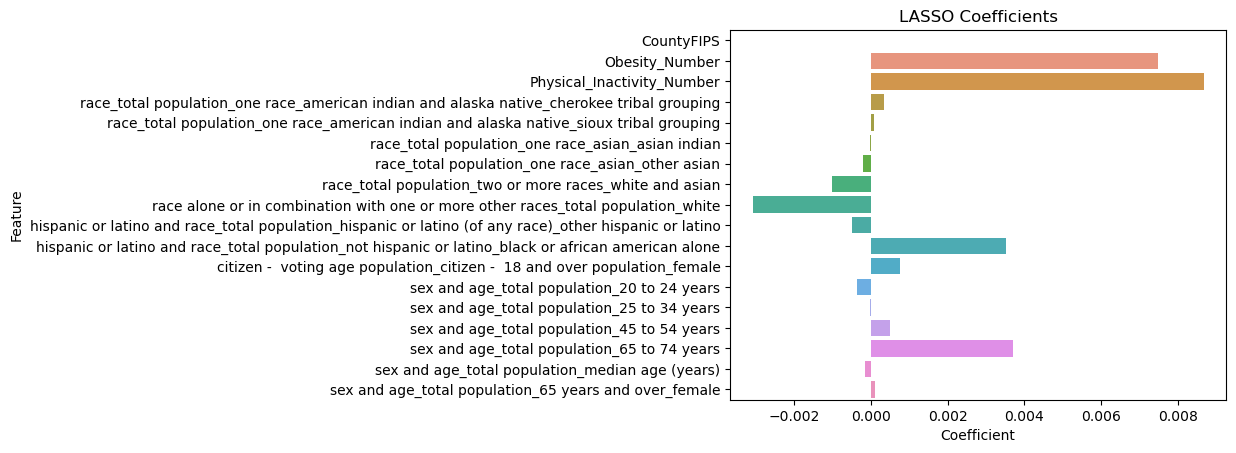

In [198]:
# Model 3 training

#create model
lasso_reg = Lasso(max_iter=15000, alpha = .001)  # note the hypterparameter tuning will not converge with max_iter < 15000

# fit model
lasso_model = lasso_reg.fit(X_train, 
                            y_train)

# model output
print(lasso_model.coef_)
print(lasso_model.intercept_)

# create a dataframe with the coefficient and feature names for plotting
lasso_reg_data = pd.DataFrame([lasso_model.coef_, X.columns]).T 
lasso_reg_data.columns = ['Coefficient', 'Feature']     

# Filter the dataframe to include only features with coefficients not equal to 0
filtered_data = lasso_reg_data[lasso_reg_data['Coefficient'] != 0]

# Create the bar plot
ax = sns.barplot(x="Coefficient", y="Feature", data=filtered_data)
ax.set_title("LASSO Coefficients")                            

# Show the plot
plt.show()

## 5. Validate and Refine Models

### 5.1 Predict on the validation set
Using each of the models you trained, predict outcomes in the validation set. Evaluate how well each model did.

In [166]:
#
# Predict on validation data

# OLS Validation

lin_pred = lin_model.predict(X_validate)

# RMSE Fcn

def rmse(pred, actual):
    return np.sqrt(np.mean((pred - actual) ** 2))

# OLS RMSE

rmse(lin_pred,     
     y_validate)


0.02130238997665192

In [167]:
# Ridge Validation

ridge_pred = ridge_model.predict(X_validate)

# Ridge RMSE

rmse(ridge_pred,
     y_validate)

0.0196212487682076

In [168]:
# LASSO Validation

lasso_pred = lasso_model.predict(X_validate)

# LASSO RMSE

rmse(lasso_pred,
    y_validate)

0.019278943174787223

### 5.2 Predict on the test set

Now, choose your best performing model of the three, select out unimportant feature(s), retrain the model, and then predict on the test set. 

In [191]:
#
# Predict using your best model

lasso_test = lasso_model.predict(X_test)

#Test LASSO RMSE
rmse(lasso_test,
    y_test)

# Calculated r squared out of curiousity
print('R squared for training set is', round(lasso_model.score(X_train, y_train)*100, 2))

print('R squared for test set is', round(lasso_model.score(X_test, y_test)*100, 2))

R squared for training set is 50.1
R squared for test set is 44.12


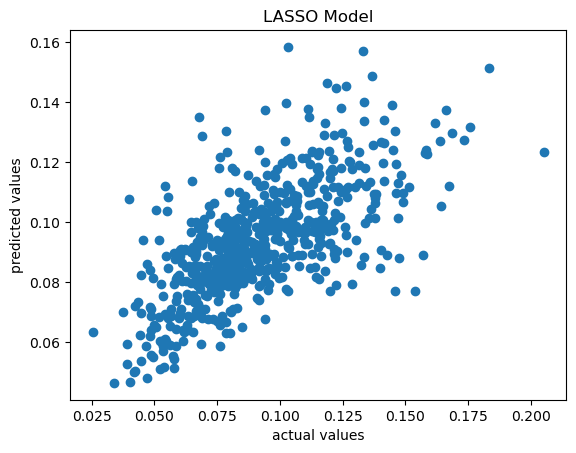

In [176]:
#Visualization
plt.scatter(y_test, lasso_test)

# add title and labels
plt.title('LASSO Model')
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

Model Evaluation. What is the advantage of using both validation and test sets in the social
sciences and public policy?

The LASSO model did fairly well at predicting the test set. The RMSE of the test set was 0.021, compared to the training 0.019 in the validation set, meaning that the model is not overfitted. I chose not to remove any variables as the tuning parameter zero'd out most of the features in the original model. However, the advantage of using a validation set is that for other types of models where there is no tuning parameter, one could choose to get rid of features that don't make theoretical sense to include or that might be confounders. 



### 5.3 Impement a cross-validation approach

Finally, implement a cross-validation approach for your best model and evaluate the results.

In [195]:
#Importing library
from sklearn.model_selection import cross_val_score

# Run cross-validation

lasso_cv = cross_val_score(lasso_model, X_train, y_train, cv=10)

print("%0.2f accuracy with a standard deviation of %0.2f" % (lasso_cv.mean(), lasso_cv.std()))

lasso_cv

0.49 accuracy with a standard deviation of 0.06


array([0.40146976, 0.4649637 , 0.45399249, 0.46163679, 0.53268746,
       0.54904004, 0.46393008, 0.60334746, 0.50109426, 0.42041636])

Describe the tradeoffs involved with the choice of k. Evaluate the results. How did cross-validation do compared to the train/validation/test split?

A higher k means that more data is being trained and a smaller amount of the data is being tested, resulting in higher prediction accuracy. A lower k (fewer folds) means more data is tested, but that can result in lower prediction accuracy. However, there is a computational tradeoff with larger number of folds, so 10 folds is a rule of thumb. 

The model has an accuracy of 0.49, which means the model is only accurate half of the time. **HOW DO THEY COMPARE?????**

## 6. Discussion Questions

In this section, insert responses for discussion questions here.

1. What is bias-variance tradeoff? Why is it relevant to machine learning problems like this one?

The bias-variance has to do with overfitting. Models with more of the data included in the training set, or more complex models, have lower bias because the model is well fit to the data. However, in these cases there is higher variance as the model may not be able to predict the outcome variable well on the test set if it is overfitted to the training data. However, in more flexible (less complex) models, bias can increase and the model may not have actually identified the key relationships affecting the outcome variable. 

The bias-variance tradeoff is relevant to any supervised machine learning problem. There is of course a desire to have the best fit model possible, but that comes with the tradeoff of more variance in predictions on test data (and future prediction data). However, we want to ensure that the model is capturing which features are related to the outcome variable. Particularly in the case of health outcomes, it's important to identify the most at-risk counties to improve policy and prevent future illness. 

2. Define overfitting, and why it matters for machine learning. How can we address it?

Overfitting is when the model is very sensitive to even small changes in the data. This results in accurate predictions for training data, but not for test data. This can result from a dataset that is too small, or from noise in the data that the algorithm learns. We can address overfitting by removing irrelevant features, using cross validation, or using shrinkage/subset selection.  

3. Discuss your analysis in 2-3 paragraphs. Discuss your findings and recommendations. Which counties or regions would you prioritize for the pilot program? Would your answers change based on whether you want to take into account certain features such as race, gender, or age composition in the county? How confident would you be deploying this sort of model in a real-world application – why or why not?

The LASSO model did well on the training and the test data, with similar RMSE values for both. The r-squared was also similar, at about .5 (.44 for the test set). The model explains about half of the variation in the data. In a visualization of the non-zero model coefficients, we see that -- aligned with CDC info on diabetes risk factors -- obesity rate, physical inactivity rate, age (45+ but moreso for ages 65+), and certain racial identities are more associated with diabetes rates. The model eliminated region variables, which makes sense given that region is associated with these other characteristics but does not directly affect diabetes. However, the exploratory data analysis showed that the West and the South had highest rates of obesity, and the Southeast and the South had highest rates of physical inactivity. I would prioritize these regions, but more specifically look at the obesity rates and physical inactivity rates of specific counties to target in the piltot program. After that, I would look at the proportion of Black residents and the proportion of residents over age 65 for additional consideration in the program. 

In this case, I would consider deploying a version of this model in the real-world. While the algorithm's predictions aren't completely accurate, the risk of a "false positive" (inaccurate prediction that is too high) is low: investing resources in diabetes prevention into a county that has a lower baseline diabetes rate would still lower diabetes rates among those with diabetes, which is good. While a false negative (inaccurate prediction that is too low) would mean a county isn't getting resources it needs to combat diabetes, I would assume algorithm use is accompanied by data analysis on diabetes trends over time. In that case, the pilot program would be able to catch counties that fell through the "cracks" of the algorithm and who need additional resources. However, given that the model has similar fit across the test and train data, and aligns with CDC's medical guidance on diabetes, it seems to be accurate and has a low risk of doing harm.